In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import minisom

In [370]:
with open('Cohonen_data3.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df.head()

,0,1
0,-2.816477,-2.469336
1,-2.215812,-0.121609
2,-1.169297,1.605516
3,-0.260793,0.096551
4,-1.730072,-1.017450


In [371]:
df.describe()

,0,1
count,25.000000,25.000000
mean,-1.565471,-0.222467
std,0.868840,1.455739
min,-2.816477,-2.659354
25%,-2.296735,-0.977816
50%,-1.484391,0.096551
75%,-1.060511,0.560177
max,-0.054517,1.895486


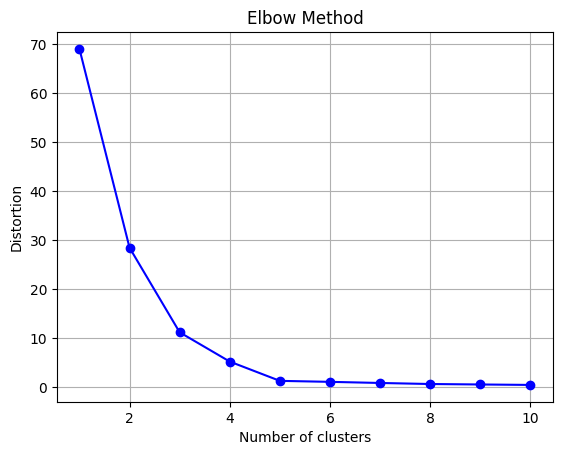

In [372]:
# Apply elbow method to find number of clusters

distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

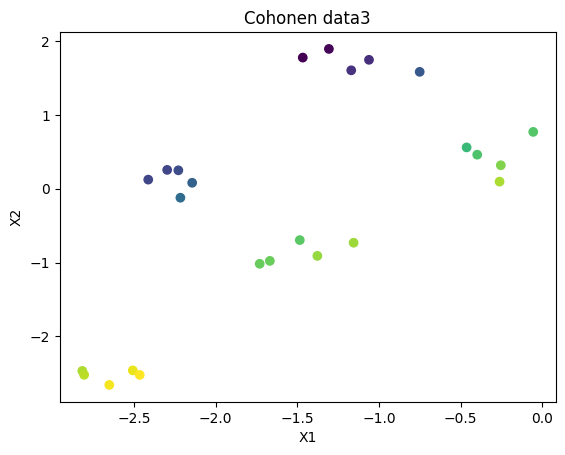

In [373]:
plt.scatter(df[0], df[1], c = df[0] - df[1], cmap = 'viridis')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Cohonen data3")
plt.show()

In [374]:
som = minisom.MiniSom(5, 1, df.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df.values)
som.train_random(df.values, 50)
feature_map = som.win_map(df.values)

In [375]:
feature_map

defaultdict(list,
            {(4, 0): [array([-2.81647741, -2.46933572]),
              array([-2.50738132, -2.46253546]),
              array([-2.4648124 , -2.52352955]),
              array([-2.65135579, -2.65935364]),
              array([-2.80529796, -2.52233445])],
             (0, 0): [array([-2.21581187, -0.12160931]),
              array([-2.14364182,  0.08107247]),
              array([-2.22831208,  0.24997384]),
              array([-2.29673464,  0.25570526]),
              array([-2.41274303,  0.12357453])],
             (2, 0): [array([-1.16929666,  1.60551596]),
              array([-1.46620942,  1.77799346]),
              array([-0.74995187,  1.58483481]),
              array([-1.06051113,  1.74775251]),
              array([-1.30608501,  1.89548642])],
             (3, 0): [array([-0.26079309,  0.09655145]),
              array([-0.39759081,  0.46190074]),
              array([-0.25302637,  0.31822519]),
              array([-0.46254871,  0.56017728]),
              ar

In [376]:
for i in feature_map.items():
    print(i)

((4, 0), [array([-2.81647741, -2.46933572]), array([-2.50738132, -2.46253546]), array([-2.4648124 , -2.52352955]), array([-2.65135579, -2.65935364]), array([-2.80529796, -2.52233445])])
((0, 0), [array([-2.21581187, -0.12160931]), array([-2.14364182,  0.08107247]), array([-2.22831208,  0.24997384]), array([-2.29673464,  0.25570526]), array([-2.41274303,  0.12357453])])
((2, 0), [array([-1.16929666,  1.60551596]), array([-1.46620942,  1.77799346]), array([-0.74995187,  1.58483481]), array([-1.06051113,  1.74775251]), array([-1.30608501,  1.89548642])])
((3, 0), [array([-0.26079309,  0.09655145]), array([-0.39759081,  0.46190074]), array([-0.25302637,  0.31822519]), array([-0.46254871,  0.56017728]), array([-0.05451671,  0.77086107])])
((1, 0), [array([-1.730072  , -1.01745014]), array([-1.66772091, -0.97781608]), array([-1.48439085, -0.69588561]), array([-1.15468558, -0.73166564]), array([-1.37681554, -0.90978969])])


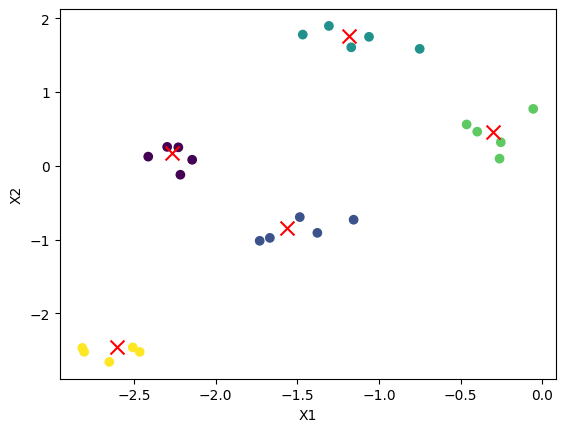

In [377]:
labels = []

for cluster in df.values:
    labels.append(som.winner(cluster)[0])

plt.scatter(df[0], df[1], c = labels)

for center in som.get_weights():
    plt.scatter(center[:, 0], center[:, 1], marker = 'x', s = 100, c = 'red')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [378]:
df.loc[len(df.index)] = [0, 0] 

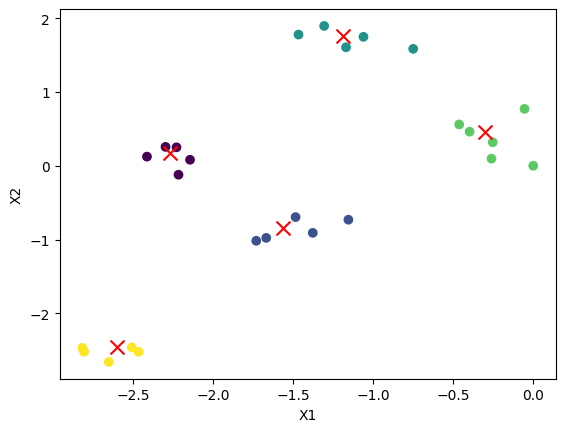

In [379]:
labels = []

for cluster in df.values:
    labels.append(som.winner(cluster)[0])

plt.scatter(df[0], df[1], c = labels)

for center in som.get_weights():
    plt.scatter(center[:, 0], center[:, 1], marker = 'x', s = 100, c = 'red')


plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [380]:
with open('Learning_data3.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7
0,7.0,6.0,7.0,4.0,5.0,4.0,7.0,7.0
1,8.0,6.0,7.0,6.0,7.0,6.0,8.0,7.0
2,10.0,10.0,9.0,9.0,10.0,9.0,10.0,9.0
3,8.0,7.0,7.0,7.0,8.0,7.0,9.0,8.0
4,8.0,7.0,7.0,7.0,9.0,8.0,9.0,8.0


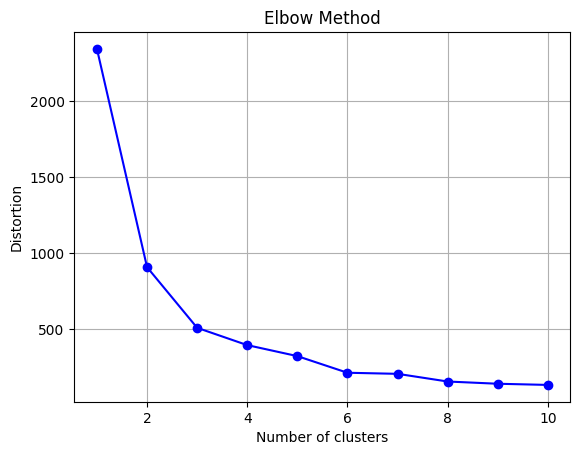

In [381]:
# Apply elbow method to find number of clusters

distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [382]:
with open('PCA_data3.txt', 'r') as f:
    data = np.loadtxt(f)

df_PCA = pd.DataFrame(data)

df_PCA.head()

,0,1
0,-2.056897,1.201587
1,-0.419088,0.101595
2,4.003108,-0.010770
3,0.862248,-0.231968
4,1.202436,-0.727492


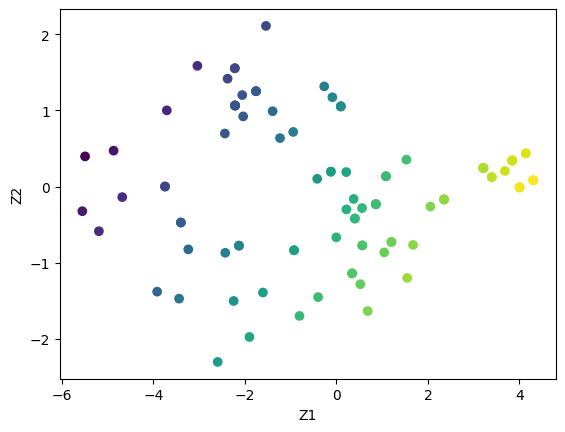

In [383]:
plt.scatter(df_PCA[0], df_PCA[1], c = df_PCA[0] - df_PCA[1])
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.show()

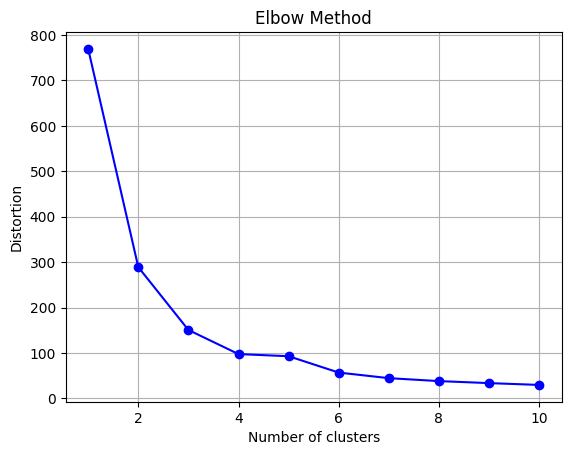

In [384]:
# Apply elbow method to find number of clusters

distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df_PCA)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [385]:
som = minisom.MiniSom(2, 2, df.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df.values)
som.train_random(df.values, 50)
feature_map = som.win_map(df.values)

In [386]:
clusters = {}
cluster_means = {}

for neuron_weights, mapped_data in feature_map.items():
    mapped_data = np.array(mapped_data)
    mean_values = np.mean(mapped_data, axis = 0)
    clusters[neuron_weights] = mapped_data
    cluster_means[neuron_weights] = mean_values

for neuron_weights, mean_values in cluster_means.items():
    print(f"Cluster {neuron_weights}:")
    for i, mean_value in enumerate(mean_values):
        print(f"Feature {i + 1}: {mean_value}")
    print()

Cluster (0, 0):
Feature 1: 7.260869565217392
Feature 2: 5.913043478260869
Feature 3: 7.217391304347826
Feature 4: 4.434782608695652
Feature 5: 5.086956521739131
Feature 6: 4.521739130434782
Feature 7: 7.521739130434782
Feature 8: 7.173913043478261

Cluster (0, 1):
Feature 1: 7.935483870967742
Feature 2: 6.32258064516129
Feature 3: 6.774193548387097
Feature 4: 6.741935483870968
Feature 5: 8.35483870967742
Feature 6: 7.064516129032258
Feature 7: 8.35483870967742
Feature 8: 7.838709677419355

Cluster (1, 1):
Feature 1: 9.5
Feature 2: 9.307692307692308
Feature 3: 8.846153846153847
Feature 4: 8.576923076923077
Feature 5: 9.23076923076923
Feature 6: 8.846153846153847
Feature 7: 9.846153846153847
Feature 8: 9.153846153846153

Cluster (1, 0):
Feature 1: 6.15
Feature 2: 2.95
Feature 3: 4.8
Feature 4: 3.9
Feature 5: 6.25
Feature 6: 4.2
Feature 7: 6.7
Feature 8: 5.9



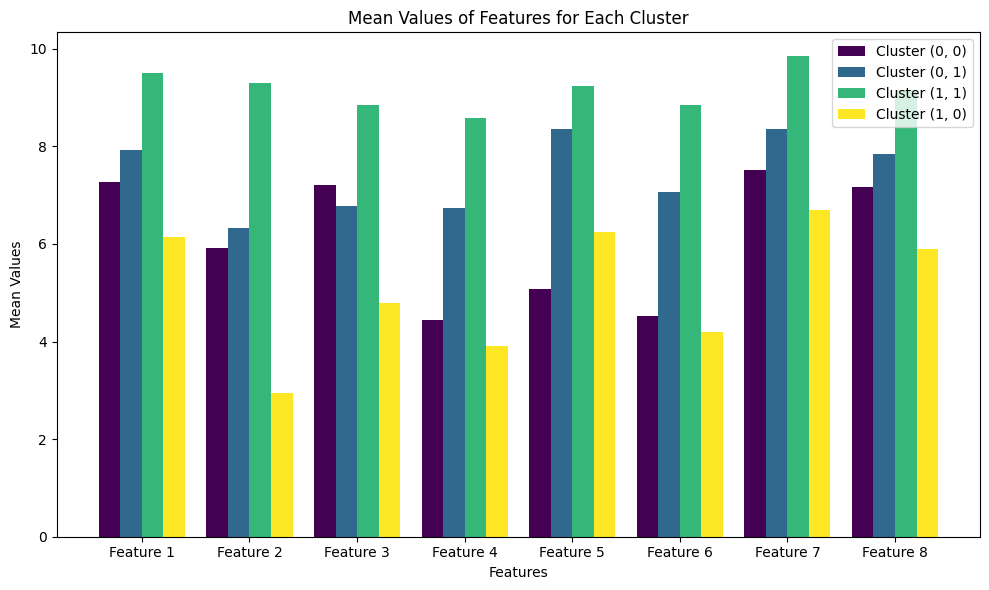

In [387]:
num_clusters = len(cluster_means)
num_features = len(list(cluster_means.values())[0])

cluster_indices = range(num_clusters)
feature_indices = range(num_features)
bar_width = 0.2

colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

plt.figure(figsize = (10, 6))

for i, (neuron_weights, mean_values) in enumerate(cluster_means.items()):
    plt.bar([x + i * bar_width for x in feature_indices], mean_values, 
            width = bar_width, label = f'Cluster {neuron_weights}', color = colors[i])

plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features for Each Cluster')
plt.xticks([x + (num_clusters - 1) * bar_width / 2 for x in feature_indices], [f"Feature {i + 1}" for i in feature_indices])
plt.legend()
plt.tight_layout()
plt.show()


In [394]:
labels = []

for cluster in df.values:
    labels.append(som.winner(cluster))

df_PCA['Lablel0'] = [i[0] for i in labels]
df_PCA['Lablel1'] = [i[1] for i in labels]
df_PCA['Lablel'] = df_PCA['Lablel0'] + 2 * df_PCA['Lablel1']
df_PCA = df_PCA.drop(['Lablel0', 'Lablel1'], axis = 1)
df_PCA.head()

,0,1,Lablel
0,-2.056897,1.201587,0
1,-0.419088,0.101595,2
2,4.003108,-0.010770,3
3,0.862248,-0.231968,2
4,1.202436,-0.727492,2


In [395]:
df_PCA.groupby('Lablel').mean()

,0,1
Lablel,,
0,-1.551227,1.175959
1,-3.469219,-0.669986
2,0.465946,-0.564482
3,3.485319,0.148139


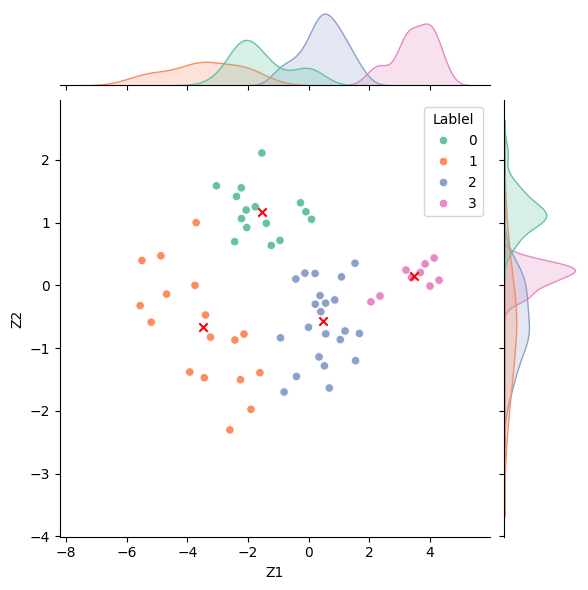

In [400]:
cluster_centers = df_PCA.groupby('Lablel').mean()
sns.jointplot(x = df_PCA[0], y = df_PCA[1], kind = "scatter", hue = df_PCA['Lablel'], palette = "Set2", height = 6)
plt.scatter(cluster_centers[0], cluster_centers[1], marker = 'x', c = 'red')
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.show()